In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [4]:
# we do not need availabality as we suppose that it is available
# I drop society because it is colinear with location. We can get the same information from location
# The other 2 columns are dropped because we do not know what they are and most people drop them in this dataset.
data.drop(['availability', 'society', 'area_type', 'balcony'], axis='columns', inplace=True)

In [5]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# As there are very few missing values so drop them
data2 = data.dropna()

In [8]:
data.describe(include='all')

,location,size,total_sqft,bath,price
count,13319,13304,13320,13247.000000,13320.000000
unique,1305,31,2117,NaN,NaN
top,Whitefield,2 BHK,1200,NaN,NaN
freq,540,5199,843,NaN,NaN
mean,NaN,NaN,NaN,2.692610,112.565627
std,NaN,NaN,NaN,1.341458,148.971674
min,NaN,NaN,NaN,1.000000,8.000000
25%,NaN,NaN,NaN,2.000000,50.000000
50%,NaN,NaN,NaN,2.000000,72.000000
75%,NaN,NaN,NaN,3.000000,120.000000


In [9]:
# Now we check what kind of data is stored in each column

for column in data2.columns:
    print(data2[column].value_counts())
    print('___' * 20)

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64
____________________________________________________________
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64
_______

In [10]:
# First we correct the size column as it has 2BHK and 2 bedrooms which is essentially the same
data2['BHK'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\anasw\AppData\Local\Temp\ipykernel_36648\2085165516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['BHK'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))


# Now I will clean total_sqft column as it includes some values with range

In [11]:
data2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
BHK             int64
dtype: object

In [12]:
data2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
# defining a function to show all those values that have something else than a float number

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
# '~' This value shows results of all false values

data2[~data2['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
# This function will take average whereever there is a range

def convert_range_to_number(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
data3 = data2.copy()

In [17]:
data3['total_sqft'] = data3['total_sqft'].apply(convert_range_to_number)

In [18]:
# The missing values comes from those values that are like this in the data set '1000Sq. Meter'
data3.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [19]:
data3.isna().any()

location      False
size          False
total_sqft     True
bath          False
price         False
BHK           False
dtype: bool

In [19]:
data3.dropna(inplace=True)

In [20]:
data3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [21]:
data3.describe(include='all')

,location,size,total_sqft,bath,price,BHK
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000
unique,1298,31,NaN,NaN,NaN,NaN
top,Whitefield,2 BHK,NaN,NaN,NaN,NaN
freq,532,5192,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000


# Now to clean location column

In [22]:
data4 = data3.copy()

In [23]:
# First I will strip extra spaces that are at the end or in the beginning of the data

data4.location = data4.location.apply(lambda x: x.strip())

In [24]:
# pd.set_option("display.max_rows", None)

In [25]:
# we can see that location has 1298 unique values which are alot so we merge some values in another value called 'Other'

x = data4.groupby('location')['location'].agg('count')

x.sort_values(ascending=False)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [26]:
len(x[x<=10])

1047

In [27]:
# We can see that almost 1047 values can be merged to other because they have values less than 10

other = x[x <= 10]

data4.location = data4.location.apply(lambda x: "Other" if x in other else x)

In [28]:
# We reduced categories from 1287 to 241

len(data4.location.unique())

241

# Outlier Detection

In [29]:
data5 = data4.copy()

In [30]:
data5.head(20)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Other,6 Bedroom,1020.0,6.0,370.00,6


In [31]:
data5.describe(include='all')

,location,size,total_sqft,bath,price,BHK
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000
unique,241,31,NaN,NaN,NaN,NaN
top,Other,2 BHK,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000


### Checking and Removing outliers from Price

C:\Users\anasw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

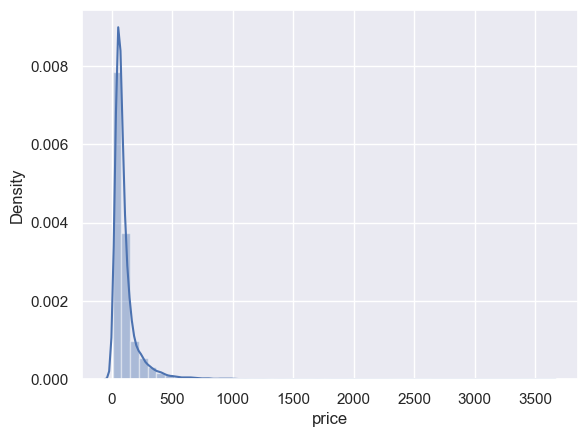

In [32]:
sns.distplot(data5['price'])

In [33]:
q = data5['price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data6 = data5[data5['price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data6.describe(include='all')

,location,size,total_sqft,bath,price,BHK
count,13066,13066,13066.000000,13066.000000,13066.000000,13066.000000
unique,241,30,NaN,NaN,NaN,NaN
top,Other,2 BHK,NaN,NaN,NaN,NaN
freq,2807,5192,NaN,NaN,NaN,NaN
mean,NaN,NaN,1513.387104,2.666998,101.778398,2.780576
std,NaN,NaN,1099.072536,1.277259,89.928475,1.231551
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000
50%,NaN,NaN,1268.000000,2.000000,70.000000,3.000000
75%,NaN,NaN,1650.000000,3.000000,118.000000,3.000000


C:\Users\anasw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

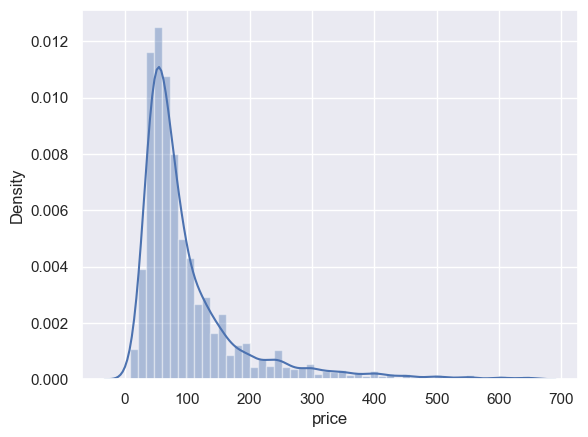

In [34]:
sns.distplot(data6['price'])

### Checking and Removing outliers from total_sqft

C:\Users\anasw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

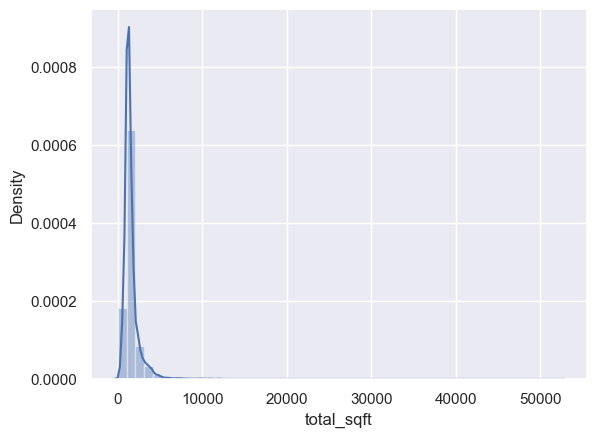

In [35]:
sns.distplot(data5['total_sqft'])

In [36]:
q = data6['total_sqft'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data7 = data6[data6['total_sqft']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data7.describe(include='all')

,location,size,total_sqft,bath,price,BHK
count,12924,12924,12924.000000,12924.000000,12924.000000,12924.000000
unique,241,26,NaN,NaN,NaN,NaN
top,Other,2 BHK,NaN,NaN,NaN,NaN
freq,2759,5190,NaN,NaN,NaN,NaN
mean,NaN,NaN,1453.267982,2.637574,99.004762,2.756035
std,NaN,NaN,647.335309,1.215737,84.965054,1.177959
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000
25%,NaN,NaN,1100.000000,2.000000,49.807500,2.000000
50%,NaN,NaN,1260.000000,2.000000,70.000000,3.000000
75%,NaN,NaN,1640.000000,3.000000,115.000000,3.000000


C:\Users\anasw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

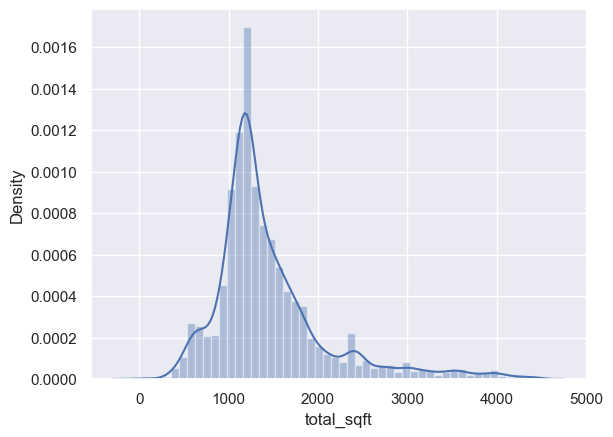

In [37]:
sns.distplot(data7['total_sqft'])

### Now removing outliers from BHK

In [38]:
data7[(data7.total_sqft / data7.BHK) < 300]

,location,size,total_sqft,bath,price,BHK
9,Other,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8
70,Other,3 Bedroom,500.0,3.0,100.0,3
...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7
13279,Other,6 Bedroom,1200.0,5.0,130.0,6
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5


In [39]:
data7.shape

(12924, 6)

In [40]:
data8 = data7[~(data7.total_sqft / data7.BHK < 300)]
data8.shape

(12183, 6)

### Now removing outliers from bath

In [41]:
data8.describe(include='all')

,location,size,total_sqft,bath,price,BHK
count,12183,12183,12183.000000,12183.000000,12183.000000,12183.000000
unique,241,20,NaN,NaN,NaN,NaN
top,Other,2 BHK,NaN,NaN,NaN,NaN
freq,2445,5160,NaN,NaN,NaN,NaN
mean,NaN,NaN,1483.414955,2.508906,97.185769,2.603874
std,NaN,NaN,648.577141,0.987559,85.111676,0.897666
min,NaN,NaN,300.000000,1.000000,9.000000,1.000000
25%,NaN,NaN,1110.000000,2.000000,48.720000,2.000000
50%,NaN,NaN,1290.000000,2.000000,69.000000,2.000000
75%,NaN,NaN,1660.200000,3.000000,110.000000,3.000000


In [42]:
# Usually when there are 2 bedrooms there are maximum 4 bathrooms. More than that is unusuall
data8[data8.bath > data8.BHK + 2]

,location,size,total_sqft,bath,price,BHK
1078,Other,9 Bedroom,3300.0,14.0,500.0,9
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3


In [43]:
data9 = data8[~(data8.bath > data8.BHK + 2)]
data9.shape

(12180, 6)

# Now cleaning is done so lets do linear Regression

In [44]:
cleaned_data = data9.copy()

In [45]:
cleaned_data.drop('size', axis=1, inplace=True)

In [46]:
cleaned_data

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,231.00,5
13316,Other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


### First lets change location in numerical categorical values

In [47]:
cleaned_data2 = data9.copy()

In [48]:
cleaned_data2.drop('size', axis=1, inplace=True)

In [49]:
cleaned_data2

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,231.00,5
13316,Other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [50]:
dummies = pd.get_dummies(cleaned_data2.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
final_data = pd.concat([cleaned_data2, dummies.drop('Other', axis = 'columns')], axis = 'columns')

In [52]:
final_data.drop('location', axis=1, inplace=True)

In [53]:
final_data

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,112.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,231.00,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,3600.0,5.0,400.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lets start machine learning

In [54]:
X = final_data.drop('price', axis=1)
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = final_data['price']
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [60]:
reg.score(X_test, y_test)

0.660826625479999

# Now lets do CrossValidation

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [63]:
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.64207351, 0.63897241, 0.62839641, 0.66335331, 0.66767669])

# Now lets check the score for other regressions

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [69]:
def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [70]:
find_best_model(X,y)

C:\Users\anasw\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\anasw\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.648094,{'normalize': False}
1,lasso,0.584565,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.529975,"{'criterion': 'mse', 'splitter': 'best'}"


# We see that the best regression to use on this dataset is LinearRegression

In [71]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(X_train)

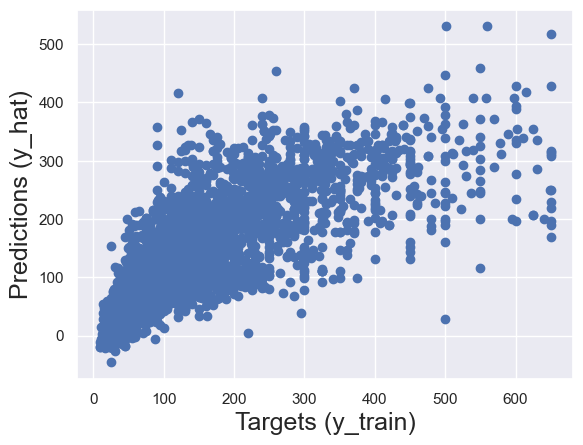

In [73]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.show()

C:\Users\anasw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

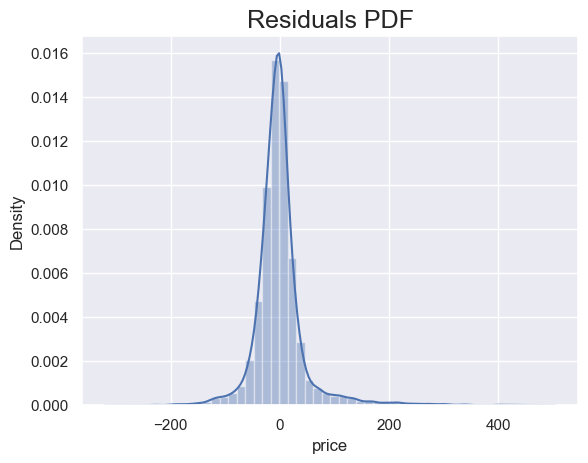

In [74]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many positive residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), positive values imply
# that y_hat (predictions) are much lower than y_train (the targets)
# This is food for thought to improve our model

### Finding Weights and Bias

In [75]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-33.390793563445925

In [76]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([ 8.50902804e-02,  1.23360409e+01, -5.01874852e+00,  9.26663808e+01,
        3.17614529e+01, -3.35920711e+01,  7.71284833e+01, -3.02190795e+01,
       -2.49706544e+01, -5.70461040e+00, -1.17634062e+01, -2.45116492e+01,
       -2.33824206e+01, -3.22488677e+01, -3.15630017e+01, -2.96753623e+01,
       -1.67881753e+01, -9.68200448e+00, -8.32503818e+00, -2.90187930e+01,
       -3.01327098e+01, -2.58007376e+01, -2.11997712e+01, -3.18956739e+01,
       -1.87121217e+01, -1.88065021e+01, -1.52761415e+00,  3.19545525e+01,
       -1.46399191e+01, -3.83000656e+01, -1.45548010e+01, -3.06290857e+00,
       -1.09470523e+01,  1.30585749e+02, -8.45629166e+00, -2.09836476e+01,
       -2.03498528e+01, -1.56907087e+01, -3.63350292e+01, -1.57883133e+01,
       -2.20341024e+01,  4.26145509e+01,  4.75656290e+01, -5.04498892e+01,
       -3.80683434e+01, -4.27278111e+01, -1.82157617e+01,  1.29287527e+02,
       -3.53128047e+01, -2.40286276e+01, -1.60705768e+01,  2.47768354e+01,
       -2.33830524e+01, -

In [78]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,total_sqft,0.085090
1,bath,12.336041
2,BHK,-5.018749
3,1st Block Jayanagar,92.666381
4,1st Phase JP Nagar,31.761453
...,...,...
238,Yelachenahalli,-16.311924
239,Yelahanka,-29.965643
240,Yelahanka New Town,-3.195152
241,Yelenahalli,-40.711804


# Testing

In [80]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(X_test)

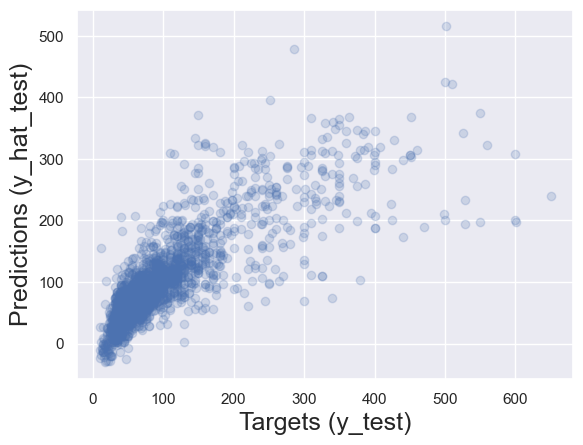

In [82]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [83]:
# Finally, let's manually check these predictions
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,54.421432
1,100.856913
2,39.073121
3,101.169544
4,40.059421


In [85]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     65.50
1     98.00
2     46.76
3    120.00
4     42.00
Name: price, dtype: float64

In [87]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,54.421432,65.50
1,100.856913,98.00
2,39.073121,46.76
3,101.169544,120.00
4,40.059421,42.00
...,...,...
2431,44.891793,62.00
2432,27.862514,25.26
2433,178.959197,128.00
2434,23.179435,43.00


In [88]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [91]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,54.421432,65.50,11.078568,16.913844
1,100.856913,98.00,-2.856913,2.915217
2,39.073121,46.76,7.686879,16.439006
3,101.169544,120.00,18.830456,15.692046
4,40.059421,42.00,1.940579,4.620426
...,...,...,...,...
2431,44.891793,62.00,17.108207,27.593883
2432,27.862514,25.26,-2.602514,10.302907
2433,178.959197,128.00,-50.959197,39.811873
2434,23.179435,43.00,19.820565,46.094337
